# IMDB Sentiment Classification with Keras NN

Import libraries

In [1]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers

### Import dataset

In [2]:
from tensorflow.keras.datasets import imdb

(train_data, train_target), (test_data, test_target) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\marek\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\marek\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

Data shape

In [3]:
print("train_data :", train_data.shape)
print("train_target : ", train_target.shape)
print("\ntest_data ", test_data.shape)
print("test_target ", test_target.shape)

train_data : (25000,)
train_target :  (25000,)

test_data  (25000,)
test_target  (25000,)


Data statistics

In [4]:
print("Categories:", np.unique(train_target))
length = [len(i) for i in train_data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))
print("Maximum value of a word index: ", max([max(sequence) for sequence in train_data]))
print("Maximum length num words of review in train :", max([len(sequence) for sequence in train_data]))   

Categories: [0 1]
Average Review length: 238.71364
Standard Deviation: 176
Maximum value of a word index:  9999
Maximum length num words of review in train : 2494


Representation of data

In [5]:
print("Label:", train_target[0])

Label: 1


In [6]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


See actual review in words

In [7]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in train_data[1]] )
print(decoded) 

# big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal # the hair is big lots of boobs # men wear those cut # shirts that show off their # sickening that men actually wore them and the music is just # trash that plays over and over again in almost every scene there is trashy music boobs and # taking away bodies and the gym still doesn't close for # all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then


### Data preparation

Encoding integer sequence into binary matrix using one hot encoder

From integers which represents words to normalised one hot encoded tensor (matrix) of 10 thousand columns

In [8]:
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
 
x_train = vectorize(train_data)
y_train = np.array(train_target).astype("float32")
x_test = vectorize(test_data)
y_test = np.array(test_target).astype("float32")

In [9]:
print(x_test[0].size)

10000


In [10]:
from tensorflow.keras import regularizers

model = models.Sequential()
# Input layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50,  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50,  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.002),  activation = "relu"))
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(25,  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.003),  activation = "relu"))
# Output layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                500050    
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1

In [11]:
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)
train_history = model.fit(
 x_train, y_train,
 epochs= 10,
 batch_size = 200,
 validation_data = (x_test, y_test)
)

Epoch 1/10
125/125 [==============================] - 3s 17ms/step - loss: 1.1173 - accuracy: 0.7933 - val_loss: 0.6917 - val_accuracy: 0.8862
Epoch 2/10
125/125 [==============================] - 1s 11ms/step - loss: 0.4982 - accuracy: 0.9137 - val_loss: 0.4506 - val_accuracy: 0.8811
Epoch 3/10
125/125 [==============================] - 1s 10ms/step - loss: 0.3078 - accuracy: 0.9401 - val_loss: 0.4117 - val_accuracy: 0.8803
Epoch 4/10
125/125 [==============================] - 1s 11ms/step - loss: 0.2420 - accuracy: 0.9561 - val_loss: 0.4338 - val_accuracy: 0.8768
Epoch 5/10
125/125 [==============================] - 1s 10ms/step - loss: 0.2036 - accuracy: 0.9680 - val_loss: 0.4532 - val_accuracy: 0.8770
Epoch 6/10
125/125 [==============================] - 1s 10ms/step - loss: 0.1763 - accuracy: 0.9762 - val_loss: 0.4705 - val_accuracy: 0.8726
Epoch 7/10
125/125 [==============================] - 1s 10ms/step - loss: 0.1545 - accuracy: 0.9832 - val_loss: 0.5041 - val_accuracy: 0.8726

In [12]:
results = model.evaluate(x_test, y_test, verbose=1)
results

782/782 [==============================] - 2s 2ms/step - loss: 0.5608 - accuracy: 0.8698


[0.5608053207397461, 0.8697999715805054]

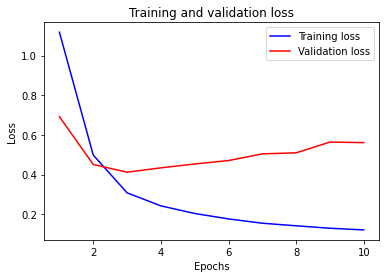

In [13]:
import matplotlib.pyplot as plt

loss_values = train_history.history["loss"]
validation_loss_val = train_history.history["val_loss"]

epochs = range(1, 11)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, validation_loss_val, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

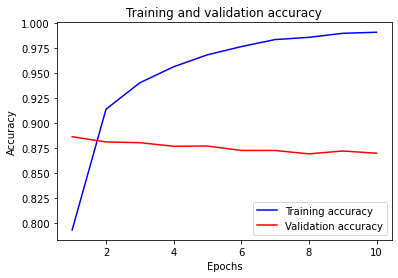

In [14]:
train_acc = train_history.history['accuracy']
validation_acc = train_history.history["val_accuracy"]

plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, validation_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In above chart we can see that accuracy is growing for train dataset only it could be sign of overfitting

### Second model with different regularization values L1 and L2 and RMSprop optimizer

In [15]:
model = models.Sequential()
# Input layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50,  kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01), activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50,  kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.02),  activation = "relu"))
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(25,  kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.03),  activation = "relu"))
# Output layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                500050    
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 25)               

In [16]:
model.compile(
 optimizer = "RMSprop",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)
train_history = model.fit(
 x_train, y_train,
 epochs= 10,
 batch_size = 200,
 validation_data = (x_test, y_test)
)

Epoch 1/10
125/125 [==============================] - 3s 16ms/step - loss: 6.0841 - accuracy: 0.7584 - val_loss: 2.7718 - val_accuracy: 0.8739
Epoch 2/10
125/125 [==============================] - 2s 12ms/step - loss: 1.3787 - accuracy: 0.8579 - val_loss: 0.6447 - val_accuracy: 0.8777
Epoch 3/10
125/125 [==============================] - 2s 12ms/step - loss: 0.5975 - accuracy: 0.8741 - val_loss: 0.5485 - val_accuracy: 0.8883
Epoch 4/10
125/125 [==============================] - 2s 12ms/step - loss: 0.5392 - accuracy: 0.8870 - val_loss: 0.5187 - val_accuracy: 0.8918
Epoch 5/10
125/125 [==============================] - 2s 12ms/step - loss: 0.5036 - accuracy: 0.8975 - val_loss: 0.5031 - val_accuracy: 0.8909
Epoch 6/10
125/125 [==============================] - 2s 12ms/step - loss: 0.4777 - accuracy: 0.9050 - val_loss: 0.4949 - val_accuracy: 0.8904
Epoch 7/10
125/125 [==============================] - 2s 12ms/step - loss: 0.4593 - accuracy: 0.9108 - val_loss: 0.4876 - val_accuracy: 0.8892

In [17]:
results = model.evaluate(x_test, y_test, verbose=1)
results

782/782 [==============================] - 2s 2ms/step - loss: 0.4852 - accuracy: 0.8860


[0.48517659306526184, 0.8859599828720093]

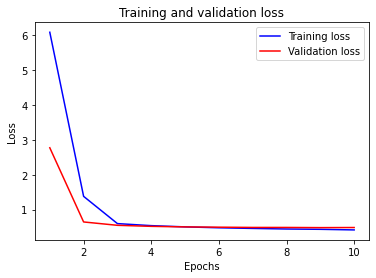

In [18]:
loss_values = train_history.history["loss"]
validation_loss_val = train_history.history["val_loss"]

epochs = range(1, 11)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, validation_loss_val, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

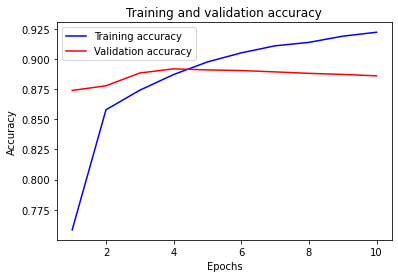

In [19]:
train_acc = train_history.history['accuracy']
validation_acc = train_history.history["val_accuracy"]

plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, validation_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In above chart we see accuracy growing only for training dataset it also could be sign of overfitting

### Third model with reduced number of hidden layers and Ada Grad optimizer

In [20]:
model = models.Sequential()
# Input layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden layers
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50,  kernel_regularizer=regularizers.l1_l2(l1=0.04, l2=0.04),  activation = "relu"))
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(25,  kernel_regularizer=regularizers.l1_l2(l1=0.02, l2=0.03),  activation = "relu"))
# Output layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 50)                500050    
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 26        
Total params: 503,901
Trainable params: 503,901
Non-trainable params: 0
________________________________________________

In [21]:
model.compile(
 optimizer = "Adagrad",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)
train_history = model.fit(
 x_train, y_train,
 epochs= 10,
 batch_size = 200,
 validation_data = (x_test, y_test)
)

Epoch 1/10
125/125 [==============================] - 2s 16ms/step - loss: 18.5666 - accuracy: 0.5077 - val_loss: 17.7187 - val_accuracy: 0.5172
Epoch 2/10
125/125 [==============================] - 1s 12ms/step - loss: 17.0976 - accuracy: 0.5267 - val_loss: 16.5273 - val_accuracy: 0.5502
Epoch 3/10
125/125 [==============================] - 1s 12ms/step - loss: 16.0526 - accuracy: 0.5373 - val_loss: 15.6017 - val_accuracy: 0.5812
Epoch 4/10
125/125 [==============================] - 1s 12ms/step - loss: 15.2096 - accuracy: 0.5556 - val_loss: 14.8311 - val_accuracy: 0.6054
Epoch 5/10
125/125 [==============================] - 1s 12ms/step - loss: 14.4941 - accuracy: 0.5700 - val_loss: 14.1648 - val_accuracy: 0.6248
Epoch 6/10
125/125 [==============================] - 1s 12ms/step - loss: 13.8668 - accuracy: 0.5827 - val_loss: 13.5732 - val_accuracy: 0.6454
Epoch 7/10
125/125 [==============================] - 1s 11ms/step - loss: 13.3051 - accuracy: 0.5928 - val_loss: 13.0394 - val_ac

In [22]:
results = model.evaluate(x_test, y_test, verbose=1)
results

782/782 [==============================] - 2s 2ms/step - loss: 11.6889 - accuracy: 0.7026


[11.68894100189209, 0.7026399970054626]

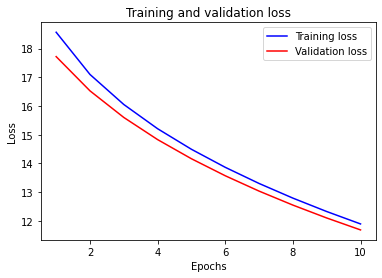

In [23]:
loss_values = train_history.history["loss"]
validation_loss_val = train_history.history["val_loss"]

epochs = range(1, 11)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, validation_loss_val, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

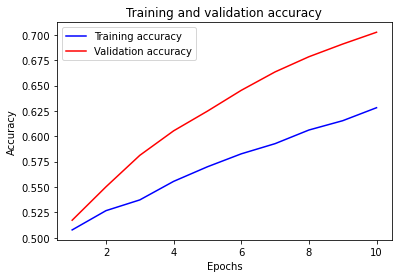

In [24]:
train_acc = train_history.history['accuracy']
validation_acc = train_history.history["val_accuracy"]

plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, validation_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Last model without regularizers and simple sgd optimizer  

In [25]:
model = models.Sequential()
# Input layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden layers
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(25, activation = "relu"))
# Output layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 50)                500050    
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 26        
Total params: 503,901
Trainable params: 503,901
Non-trainable params: 0
________________________________________________

In [26]:
model.compile(
 optimizer = "sgd",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

train_history = model.fit(
 x_train, y_train,
 epochs= 10,
 batch_size = 200,
 validation_data = (x_test, y_test)
)

Epoch 1/10
125/125 [==============================] - 2s 14ms/step - loss: 0.6920 - accuracy: 0.5188 - val_loss: 0.6899 - val_accuracy: 0.5526
Epoch 2/10
125/125 [==============================] - 1s 10ms/step - loss: 0.6881 - accuracy: 0.5531 - val_loss: 0.6828 - val_accuracy: 0.5922
Epoch 3/10
125/125 [==============================] - 1s 10ms/step - loss: 0.6798 - accuracy: 0.5972 - val_loss: 0.6699 - val_accuracy: 0.6466
Epoch 4/10
125/125 [==============================] - 1s 10ms/step - loss: 0.6655 - accuracy: 0.6454 - val_loss: 0.6476 - val_accuracy: 0.7113
Epoch 5/10
125/125 [==============================] - 1s 10ms/step - loss: 0.6418 - accuracy: 0.6924 - val_loss: 0.6127 - val_accuracy: 0.7552
Epoch 6/10
125/125 [==============================] - 1s 10ms/step - loss: 0.6063 - accuracy: 0.7282 - val_loss: 0.5642 - val_accuracy: 0.7841
Epoch 7/10
125/125 [==============================] - 1s 10ms/step - loss: 0.5593 - accuracy: 0.7623 - val_loss: 0.5074 - val_accuracy: 0.8104

In [27]:
results = model.evaluate(x_test, y_test, verbose=1)
results

782/782 [==============================] - 2s 2ms/step - loss: 0.3825 - accuracy: 0.8467


[0.38249996304512024, 0.8466799855232239]

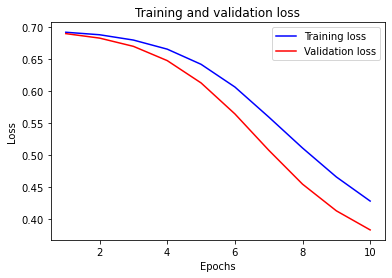

In [28]:
loss_values = train_history.history["loss"]
validation_loss_val = train_history.history["val_loss"]

epochs = range(1, 11)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, validation_loss_val, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

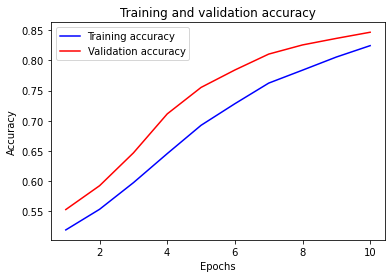

In [29]:
train_acc = train_history.history['accuracy']
validation_acc = train_history.history["val_accuracy"]

plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, validation_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
print(validation_acc)

[0.5526000261306763, 0.592199981212616, 0.6466000080108643, 0.7112799882888794, 0.7551599740982056, 0.7840800285339355, 0.8104400038719177, 0.8256400227546692, 0.8364800214767456, 0.8466799855232239]


1) Model SGD without regularizers L1, L2 gave result loss = 0.38249996304512024, accuracy =  0.8466799855232239

2) Model Adagrad gave results loss = 11.68894100189209, accuracy = 0.698639988899231

3) Model RMSprop gave results loss = 0.48517659306526184, accuracy = 0.8859599828720093

4) Model Adam gave results loss = 0.5608053207397461,  accuracy = 0.8697999715805054

From all these models definately the worst results was achived with usage of Adagrad optimizer.

When it comes to accuracy (above 86%) the best results was achived via network with more hidden layers and Adam and RMS prop optimizers.

Surprisingly, the best loss value was achived with SGD model withoot any L1 and L2 regularizers loss = 0.38249996304512024

